In [35]:
import numpy as np
from matplotlib import pyplot as plt
from sortedcontainers import SortedDict
from scipy import linalg

# Задание 4.1

In [36]:
A = np.array([1,2,3,4])
n = len(A)
P = np.random.randint(1, n**3, n)
dict = {}
for i in range(n):
    dict[P[i]] = A[i]

In [37]:
x = np.array([1950,1960,1970,1980,1990,2000,2010,2020], dtype = np.int64)
y = np.array([8.9, 9.6, 9.9, 10.3, 10.4, 10.3, 10.5, 10.7])
population_real = 10.65
year = 2019

In [38]:
def MNK(x,y,degree=2):
    m = degree + 1
    n = len(x)
    S = np.zeros((m,m))
    b = np.zeros(m)
    for i in range(m):
        for j in range(m):
            S[i][j] = np.sum([value**(i+j) for value in x])
        b[i] = np.sum([y[k]*x[k]**i for k in range(n)])
    a = linalg.solve(S, b)
    sum = np.sum([(np.sum([a[k]*x[i]**k for k in range(m)])-y[i])**2 for i in range(n)]) # см. лекции
    sigma = np.sqrt(sum/n)
    return [sigma, a]

In [39]:
x = np.array([-1,1,2,3])
y = np.array([1,-1,2,0])
def f(a,x):
    return a/x
a = 4/15
sum = np.sum([(np.sum(a/x[i]-y[i]))**2 for i in range(4)]) # см. лекции

sigma = np.sqrt(sum/4)
sigma


1.2943371438598634

In [40]:
def result(a, x):
    return np.sum([a[i]*x**i for i in range(len(a))])

In [41]:
def lagrange(x, y, t):
    result = 0
    for i in range(len(y)):
        tmp = np.prod([(t - x[j])/(x[i] - x[j]) for j in range(len(x)) if i != j])
        result += y[i] * tmp
    return result

In [42]:
sd = SortedDict()
for i in range(6):
    tmp = MNK(x,y,i) # tmp = [sigma, a]
    sd[tmp[0]] = tmp[1] # sd(sigma) = a    
    
a_mkm = sd.peekitem(0)[1] 
sigma_mkm = sd.peekitem(0)[0] 


print('sigma_mkm =', sigma_mkm, ': a_mkm =', a_mkm)

population_mkm = result(a_mkm, year)
population_lagrange = lagrange(x, y, year)


sigma_mkm = 2.6372178930022424e-15 : a_mkm = [-3.25       -0.04166667  3.25       -0.95833333]


<ipython-input-38-9e54cec4e16b>:10: LinAlgWarning: Ill-conditioned matrix (rcond=7.8514e-20): result may not be accurate.
  a = linalg.solve(S, b)
<ipython-input-38-9e54cec4e16b>:10: LinAlgWarning: Ill-conditioned matrix (rcond=1.40655e-20): result may not be accurate.
  a = linalg.solve(S, b)


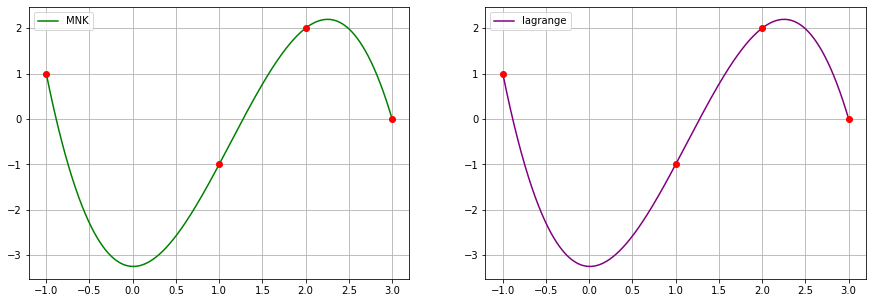

In [43]:
fig, axs = plt.subplots(1,2,figsize = (15,5))

x_data = np.linspace(x[0], x[len(x)-1], 1000)
lagrange_data = [lagrange(x, y, t) for t in x_data]



axs[0].plot(x_data,[result(a_mkm, t)  for t in x_data], color = 'g', label = 'MNK')
axs[1].plot(x_data, lagrange_data, color='purple', label='lagrange')

for i in range(2):
    axs[i].legend()
    axs[i].grid()
    axs[i].plot(x,y,'ro')

In [44]:
print('sigma_mkm', sigma_mkm)

sigma_mkm 2.6372178930022424e-15


In [45]:
print('population_mkm', population_mkm)
print('population_lagrange', population_lagrange)
print('population_real', population_real)

population_mkm -7874000904.000004
population_lagrange -7874000904.0
population_real 10.65


# Задание 4.2

In [46]:
a = 1
b = 4
eps = 0.001
def f(x):
    return x * np.sin(2 -x)

In [47]:
def lagrange(x, y, t):
    result = 0
    for i in range(len(y)):
        tmp = np.prod([(t - x[j])/(x[i] - x[j]) for j in range(len(x)) if i != j])
        result += y[i] * tmp
    return result

In [48]:
def quadratic_spline(x, y, s_0):
    n = len(x) - 1
    c = np.array([y[i] for i in range(n)])
    b = np.array([(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(n)])

    f = np.zeros(n)
    f[0] = s_0 - b[0]
    for i in range(1, n):
        f[i] = b[i] - b[i-1]
                
    a = np.zeros(n)
    # 
    a[0] = -f[0]/(x[1]-x[0])
    for i in range(1, n):
        a[i] = (f[i] - a[i-1]*(x[i] - x[i-1]))/(x[i+1] - x[i])
    spline = np.zeros((n,3))
    spline[:,0] = a
    spline[:,1] = b
    spline[:,2] = c
    return spline

def spline_func(spline, x, t):
    for i in range(1, len(x)):
        if t <= x[i]:
            return spline[i-1][0]*(t - x[i-1]) * (t - x[i]) + spline[i-1][1] * (t - x[i-1]) + spline[i-1][2]

In [49]:
# x_ex = np.array([0.2,0.3,0.5,0.9,1.2])
# y_ex = np.array([0.38,0.56,0.84,0.96,0.63])
# s_0 = 1
# spline_ex = quadratic_spline(x_ex,y_ex,s_0)
# print(spline_ex)
# x_ex_data = np.linspace(0.2, 1.2, 100)
# spline_ex_data = [spline_func(spline_ex, x_ex, t) for t in x_ex_data]
# fig, axs = plt.subplots()
# axs.plot(x_ex_data, spline_ex_data)
# axs.grid()
# axs.plot(x_ex,y_ex,'ro')

In [50]:
n_lagrange = 5
n_spline = 5

x_data = np.linspace(a, b, 500)
y_data = f(x_data)


x_lagrange = np.linspace(a, b, n_lagrange)
lagrange_data = [lagrange(x_lagrange, f(x_lagrange), t) for t in x_data]

x_spline = np.linspace(a, b, n_spline)
spline = quadratic_spline(x_spline, f(x_spline), f(a))
spline_data = [spline_func(spline, x_spline, t)  for t in x_data]

0.03442606259890857
0.09346191419102867


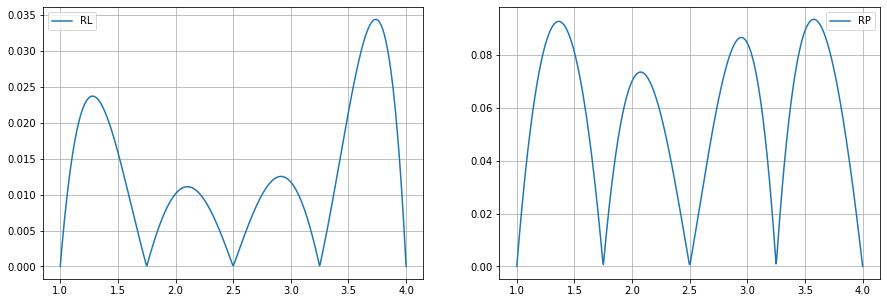

In [51]:
fig, axs = plt.subplots(1,2,figsize = (15,5))
axs[0].plot(x_data, np.abs(y_data - lagrange_data), label='RL')
axs[1].plot(x_data, np.abs(y_data - spline_data), label='RP')
for i in range(2):
    axs[i].grid()
    axs[i].legend()
print(max(y_data - lagrange_data))
print(max(y_data - spline_data))

In [52]:
while max(np.abs(y_data - lagrange_data)) >= eps:
    x_lagrange = np.linspace(a,b,n_lagrange)
    lagrange_data = [lagrange(x_lagrange, f(x_lagrange), value) for value in x_data]
    n_lagrange += 1
n_lagrange

8

In [53]:
import time
start = time.perf_counter()
while max(np.abs(y_data - spline_data)) >= eps:
    x_spline = np.linspace(a, b, n_spline)
    spline = quadratic_spline(x_spline, f(x_spline), f(a))
    spline_data = [spline_func(spline, x_spline, t)  for t in x_data]
    n_spline += 1
    if n_spline == 999:
        break
finish = time.perf_counter()
print(finish - start)
n_spline

5.177819900000003


408

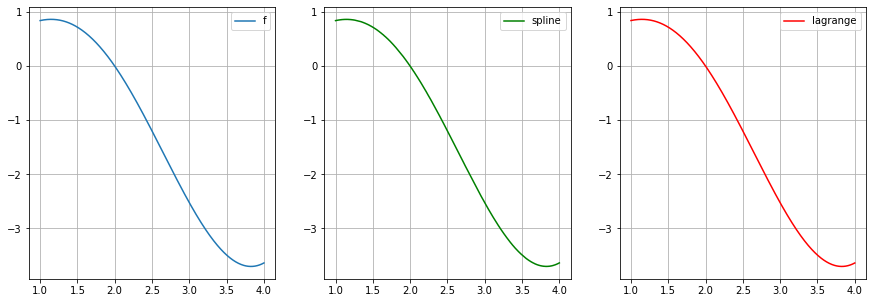

In [54]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(x_data, y_data, label='f')

axs[1].plot(x_data, spline_data, color='g', label='spline')
# axs[1].plot(x_spline, f(x_spline), 'ro')
# axs[1].set_xlim(1, 1.5)

axs[2].plot(x_data, lagrange_data, color='r', label='lagrange')
# axs[2].plot(x_lagrange, f(x_lagrange), 'ro')

for i in range(3):
    axs[i].grid()
    axs[i].legend()
    


In [55]:
print('lagrange:', n_lagrange)
print('spline:  ', n_spline)
print(max(np.abs(y_data - lagrange_data)))
print(max(np.abs(y_data - spline_data)))

lagrange: 8
spline:   408
0.0008899268233557578
0.0009980747152749103


# Задание 4.3
1. Определить функцию , вычисляющую частичную сумму ряда по коэффициентам  .
2. Вычислить коэффициенты разложения и определить требуемое количество слагаемых для достижения требуемой точности, построив график. 
3. Произвести экономизацию степенного ряда до тех пор, пока сохраняется необходимая точность (см. приложение).
4. Построить график погрешности каждого этапа экономизации.


In [56]:
def func(x):
    return np.exp(2*x) - 1

# def Taylor_sum(x, n):
#     fact = 1.
#     tmp = 1.
#     sum = 0.
#     for i in range(1, n + 1):
#         tmp *= 2*x  
#         fact *= i
#         sum += tmp/fact
#     return sum

def Taylor_(n):
    return 2**n / np.math.factorial(n)

In [57]:
def c(n):
    c = np.zeros(n+1)
    for i in range(1, n+1):
        c[i] = 2**i / np.math.factorial(i) 
    return c

def S(x, c):
    sum = 0
    for i in range(len(c)):
        sum += c[i] * x**i
    return sum

n 12


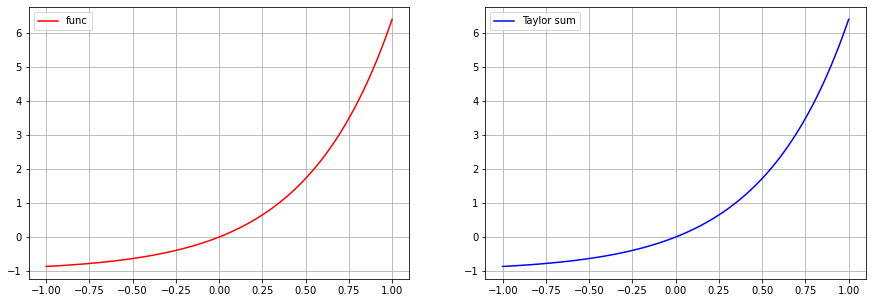

In [58]:
eps = 10**-5
n = 1
x_data = np.linspace(-1, 1, 100)
while max(abs(func(x_data) - S(x_data, c(n)))) >= eps:
    n += 1    
print('n', n)


fig, axs = plt.subplots(1, 2, figsize=(15,5))
x_data = np.linspace(-1,1,100)
axs[0].plot(x_data, func(x_data), label='func', color='r')
axs[1].plot(x_data, S(x_data, c(n)), label='Taylor sum', color='b')
for i in range(2):
    axs[i].legend()
    axs[i].grid()

In [59]:
def T(x, n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2 *x * T(x, n-1) - T(x, n-2)
    
def ex12():
    # return 1/2048 * (6144*x**10 -6912*x**8 + 3584*x**6 -840*x**4 +61*x**2 - 1 + T(x, 12))
    return np.array([-1,0,61,0,-840,0,3584,0,-6912,0,6144,0])/2048

def ex11():
    # return 1/1024 * (2816*x**9 - 2816*x**7 + 1232*x**5 - 220*x**3 + 11*x + T(x, 11))
    return np.array([0,11,0,-220,0,1232,0,-2816,0,2816,0])/1024

def ex10():
    # return 1/512 * (1280*x**8 - 1120*x**6 + 400*x**4 - 50*x**2 + 1 + T(x, 10))
    return np.array([1,0,-50,0,400,0,-1120,0,1280, 0])/512

def ex9():
    # return 1/256 * (576*x**7 - 432*x**5 + 120*x**3 - 9*x + T(x, 9))
    return np.array([0,-9,0,120,0,-432,0,576,0])/256

def ex8():
    # return 1/128 * (256*x**6 - 160*x**4 + 32*x**2 - 1 + T(x, 8))
    return np.array([-1,0,32,0,-160,0,256,0])/128

In [60]:
new_S11 = np.zeros(12)
for i in range(12):
    new_S11[i] = c(12)[i] + Taylor_(12) * ex12()[i]
eps1 = max(abs(func(x_data) - S(x_data, new_S11)))
eps1

1.5822025227762992e-06

In [61]:
new_S10 = np.zeros(11)
for i in range(11):
    new_S10[i] = new_S11[i] + Taylor_(11) * ex11()[i]
eps2 = max(abs(func(x_data) - S(x_data, new_S10)))
eps2

1.632306738663658e-06

In [62]:
new_S9 = np.zeros(10)
for i in range(10):
    new_S9[i] = new_S10[i] + Taylor_(10) * ex10()[i]
eps3 = max(abs(func(x_data) - S(x_data, new_S9)))
eps3

2.783681211049327e-05

[None, None, None, None]

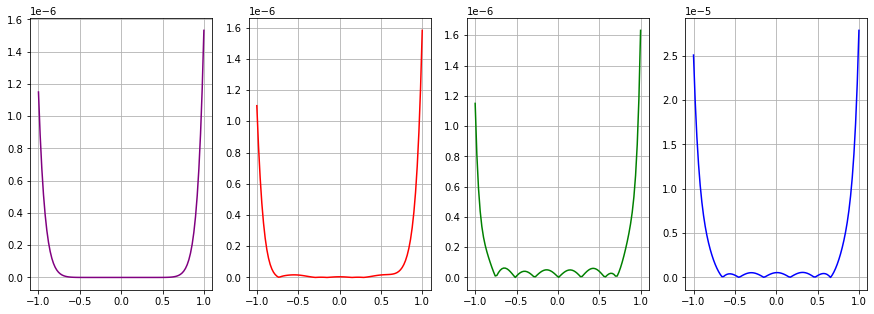

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].plot(x_data, abs(func(x_data) - S(x_data, c(12))), color='purple')
axes[1].plot(x_data, abs(func(x_data) - S(x_data, new_S11)), color='r')
axes[2].plot(x_data, abs(func(x_data) - S(x_data, new_S10)), color='g')
axes[3].plot(x_data, abs(func(x_data) - S(x_data, new_S9)),  color='b')
[axes[i].grid() for i in range(4)]